# LIBR559C Python Programming Code for Final Project
* The purpose of this  Uncovering Textual Features of Hyperpartisan News
* The code include: documments clustering, topic modeling, random forest 
* updated by Nov 11, 2018

In [2]:
ls -l

total 6497848
-rw-r--r--  1 ryanji  staff     237763 Nov 10 17:15 LIBR559C Python Programming Code.ipynb
-rw-r--r--  1 ryanji  staff        555 Nov  9 14:46 Untitled.ipynb
drwxr-xr-x  4 ryanji  staff        128 Nov 10 00:28 output/
-rw-r--r--@ 1 ryanji  staff  645234542 Oct  4 17:32 small_dataset.txt
-rw-r--r--@ 1 ryanji  staff     300000 Oct 16 15:48 small_labelset.txt
-rw-r--r--  1 ryanji  staff  616126780 Oct  5 13:46 small_prep.txt
-rw-r--r--  1 ryanji  staff  616126780 Oct  6 14:34 small_sav.txt
-rw-r--r--  1 ryanji  staff  658363774 Oct  6 17:38 small_sents.txt
-rw-r--r--  1 ryanji  staff  616126780 Oct  6 17:38 small_words.txt
-rw-r--r--@ 1 ryanji  staff       1125 Oct  6 17:45 summary_results.txt
-rw-r--r--  1 ryanji  staff    2805535 Nov  9 20:14 tokenized_txt.txt
-rw-r--r--@ 1 ryanji  staff     426075 Nov  8 11:39 w2v_vocabulary
-rw-r--r--@ 1 ryanji  staff  123201796 Nov  8 11:45 word2vec_org


In [1]:
import nltk
import numpy as np
from gensim.models import word2vec
from gensim.models import KeyedVectors
import pandas as pd
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.tokenize import sent_tokenize
import string
WPT = nltk.WordPunctTokenizer()
import re

##  Word Embeddings: Word2Vec the w2v matrix is saved in 'word2vev_org.txt' file
* It has been completed based on 1 million articles
* to idendify the semantically similiar words

In [3]:
## suppress the warning message
import warnings
warnings.filterwarnings('ignore')

In [4]:
## find the simimilar words based on the word2vec
from gensim.models import KeyedVectors
w2v= KeyedVectors.load_word2vec_format(('word2vec_org'), binary=False)

In [123]:
## the words will be specified based on other word features
w2v.most_similar(positive = ['advertisement'], topn=20)

[('melania', 0.40462902188301086),
 ('tweet', 0.36828336119651794),
 ('ivanka', 0.3366539478302002),
 ('golfing', 0.31717580556869507),
 ('mocking', 0.3164931535720825),
 ('retweeted', 0.3069987893104553),
 ('tweeting', 0.30652111768722534),
 ('tmz', 0.30600354075431824),
 ('idiot', 0.30425333976745605),
 ('gq', 0.30287742614746094),
 ('lewd', 0.3019388020038605),
 ('barron', 0.3013787269592285),
 ('harvey', 0.2999144494533539),
 ('tweets', 0.29958295822143555),
 ('griffin', 0.2979007959365845),
 ('screenshot', 0.29477062821388245),
 ('donald', 0.29348519444465637),
 ('disgusting', 0.2916927933692932),
 ('reportedly', 0.28969740867614746),
 ('tweeted', 0.2851058542728424)]

# data preparation and pre-processing

## read data set into python

In [6]:
## read the first 100 articles of the docmuments
corpus=[ ]
with open ('small_dataset.txt', 'r') as f:
        for i, line in enumerate (f):
            corpus.append(line)
            if i == 1000: # remove this syntax when it is run in cluster
                break

In [7]:
## read the first 100 label of the docmuments
labels=[ ]
with open ('small_labelset.txt', 'r') as f:
        for i, line in enumerate (f):
            line=line.replace('\n', '')
            labels.append(line)
            if i == 1000: # remove this syntax when it is run in cluster
                break

In [8]:
len(labels)

1001

## norm_doc_tokenizer , return a list of list of words

In [9]:
### Normalizing Tokens ##
def norm_doc_tokenizer (input_file):
    with open (input_file, 'r') as f:
        for i, doc in enumerate (f):
             ## lower case and remove special chars and white spaces
             #dcc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
             doc = doc.lower().replace("′", "'").replace("’", "'")\
            .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
            .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
            .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
            .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
            .replace("'ll", " will")                 
             ## remove white space 
             doc = doc.strip()
             ## tokenize documents
             tokens = WPT.tokenize(doc)
             ## remove the punctuation from the tokenized words
             table = str.maketrans('', '', string.punctuation)
             stripped = [w.translate(table) for w in tokens]
             ## only keep the English words
             words = [wd for wd in stripped if wd.isalpha()]
             ## filter out the stop words
             filtered_tokens=[t for t in words if t not in stopwords]
             yield filtered_tokens
             if i == 1000: # remove this syntax when it is run in cluster
                break      # DO NOT FORGET TO REMOVE IT

In [10]:
tokenized_corpus = list(norm_doc_tokenizer("small_dataset.txt"))

## norm_doc, return a list of list of texts 

In [11]:
def norm_doc (input_file):
    with open (input_file, 'r') as f:
        for i, doc in enumerate (f):
             ## lower case and remove special chars and white spaces
             #dcc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
             doc = doc.lower().replace("′", "'").replace("’", "'")\
            .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
            .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
            .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
            .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
            .replace("'ll", " will")    
             doc = doc.strip()
             ## tokenize documents
             tokens = WPT.tokenize(doc)
             ## remove the punctuation from the tokenized words
             table = str.maketrans('', '', string.punctuation)
             stripped = [w.translate(table) for w in tokens]
             ## only keep the English words
             words = [wd for wd in stripped if wd.isalpha()]
             ## filter out the stop words
             filtered_tokens=[t for t in words if t not in stopwords]
             single_doc = ' '.join(filtered_tokens)
             yield single_doc
             if i == 1000: # remove this syntax when it is run in cluster
                 break

In [12]:
txt = list(norm_doc("small_dataset.txt"))

In [13]:
len(txt)

1001

In [14]:
## save the tokenized txt in the text file
with open('tokenized_txt.txt', 'w') as f:
    for item in txt:
        f.write("%s\n" % item)

### Bag of N-grams Model

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
no_features = 1000 # constained to be 1000 feuatures
bv = CountVectorizer(ngram_range=(2,2),min_df=2, max_df=0.95, max_features=no_features)
bv_fit = bv.fit_transform(txt)
bv_matrix = bv_fit.toarray()
bv_feature_names = bv.get_feature_names()
bv_mat=pd.DataFrame(bv_matrix, columns=bv_feature_names)
bv_mat.head()

,ab inbev,accept liability,according associated,according new,according reuters,across country,across state,added points,additional reporting,advertising inread,...,years old,years prison,years said,yet another,york ap,york city,york times,young man,young men,young people
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Model 

In [18]:
no_features = 1000 # constained to be 1000 feuatures
tv = TfidfVectorizer(min_df=2, max_df=0.95, max_features=no_features) #set the cut-off 
tv_fit = tv.fit_transform(txt)
tv_matrix = tv_fit.toarray()
tv_feature_names = tv.get_feature_names() ## for the further use
tv_mat=pd.DataFrame(tv_matrix, columns=tv_feature_names)
tv_mat.head()

,able,abuse,access,according,account,accused,across,act,action,actions,...,write,wrong,wrote,www,year,years,yes,yet,york,young
0,0.000000,0.0,0.0,0.0,0.088223,0.181701,0.0,0.0,0.0,0.0,...,0.0,0.0,0.075153,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.029080,0.000000,0.0,0.0,0.0,0.052699
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.037888,0.000000,0.0,0.0,0.0,0.000000
3,0.046255,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.026413,0.029335,0.0,0.0,0.0,0.095731
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.076023,0.0,0.0,0.0,0.000000


## Document Similarity 

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df.loc[0:6,0:6]

,0,1,2,3,4,5,6
0,1.000000,0.013716,0.136775,0.049865,0.048234,0.066037,0.039432
1,0.013716,1.000000,0.136401,0.023693,0.015520,0.022331,0.007625
2,0.136775,0.136401,1.000000,0.048060,0.036780,0.221144,0.029716
3,0.049865,0.023693,0.048060,1.000000,0.072758,0.078435,0.064412
4,0.048234,0.015520,0.036780,0.072758,1.000000,0.064598,0.035798
5,0.066037,0.022331,0.221144,0.078435,0.064598,1.000000,0.108531
6,0.039432,0.007625,0.029716,0.064412,0.035798,0.108531,1.000000


## Documents Clustering based on similarity features 

In [131]:
corpus=np.array(corpus)
corpus_df = pd.DataFrame({'Doc': corpus, 'Hyperpartisan': labels})
corpus_df=corpus_df[['Doc','Hyperpartisan']]

In [132]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km_fit=km.fit(similarity_df)
cluster_labels = pd.DataFrame(km_fit.labels_, columns=['ClusterLabel'])
km_table=pd.concat([corpus_df, cluster_labels], axis=1)
km_table.head()

,Doc,Hyperpartisan,ClusterLabel
0,After DeVos Announced Plans To Reexamine Title...,1,4
1,University To Award Trayvon Martin With Posthu...,1,3
2,Texas State University suspends Greek life aft...,0,4
3,Red Sox waste Rodriguez outing in 1-0 loss to ...,0,0
4,Eve and the New Jerusalem Imaginings of a uto...,1,4


In [133]:
pd.crosstab(km_table['Hyperpartisan'], km_table['ClusterLabel'], margins=True)

ClusterLabel,0,1,2,3,4,5,6,7,8,9,All
Hyperpartisan,,,,,,,,,,,
0,69,36,0,59,149,24,6,37,16,34,430
1,70,77,54,54,126,37,6,88,0,59,571
All,139,113,54,113,275,61,12,125,16,93,1001


In [134]:
### another way to write the K-mean codes 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km.fit_transform(similarity_df)
cluster_labels = pd.DataFrame(km.labels_, columns=['ClusterLabel'])
km_table=pd.concat([corpus_df, cluster_labels], axis=1)
km_table.head()

,Doc,Hyperpartisan,ClusterLabel
0,After DeVos Announced Plans To Reexamine Title...,1,4
1,University To Award Trayvon Martin With Posthu...,1,9
2,Texas State University suspends Greek life aft...,0,4
3,Red Sox waste Rodriguez outing in 1-0 loss to ...,0,4
4,Eve and the New Jerusalem Imaginings of a uto...,1,9


In [135]:
pd.crosstab(km_table['Hyperpartisan'], km_table['ClusterLabel'], margins=True)

ClusterLabel,0,1,2,3,4,5,6,7,8,9,All
Hyperpartisan,,,,,,,,,,,
0,16,62,60,0,111,35,6,25,25,90,430
1,0,94,65,54,72,84,6,40,75,81,571
All,16,156,125,54,183,119,12,65,100,171,1001


# Topic Modeling

### Bag of Words Model 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
no_features =1000 # specify the features is 1000
cv = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features)
cv_fit= cv.fit_transform(txt)
cv_mat = cv_fit.toarray()
cv_feature_names=cv.get_feature_names()
cv_mt=pd.DataFrame(cv_mat, columns=cv_feature_names)
cv_mt.index# Word Representation using Hot Vectors

RangeIndex(start=0, stop=1001, step=1)

### Latent Dirichlet Allocation 
* LDA is based on the feature matrix conposed of hot vectors

In [26]:
from sklearn.decomposition import NMF, LatentDirichletAllocation  # load both LDA and NMF for Analysis

In [27]:
no_topics = 10 # specify 10 topics
lda_model= LatentDirichletAllocation(n_components=no_topics, max_iter=5, 
                                learning_method='online', learning_offset=50.,
                                random_state=0)
lda_fit=lda_model.fit(cv_fit)

In [47]:
tt_matrix = lda_fit.components_
topic_list=[ ]
for topic_weights in tt_matrix:
    topic_weights=np.round(topic_weights,2)
    ## create a paired tokens and weights to show the results
    topic = [(token, weight) for token, weight in zip(cv_feature_names, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    #topic = [item for item in topic if item[1] > 0.6]
    topic_list.append(topic)

### Display Top
topic_features=pd.DataFrame(topic_list).T
topic_features.columns=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10']
topic_features.head() # Top 10 features for each topics

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,"(students, 104.72)","(said, 840.08)","(people, 866.58)","(de, 152.11)","(new, 648.59)","(said, 609.51)","(amp, 3258.62)","(points, 9.85)","(tax, 338.42)","(oil, 249.48)"
1,"(school, 95.68)","(year, 464.63)","(one, 725.04)","(clinton, 108.57)","(opens, 441.85)","(trump, 376.45)","(gt, 160.19)","(added, 6.93)","(would, 268.8)","(percent, 99.9)"
2,"(college, 82.71)","(two, 368.4)","(said, 588.27)","(la, 103.7)","(window, 440.25)","(war, 349.89)","(lt, 134.49)","(national, 4.88)","(trump, 220.51)","(crude, 78.96)"
3,"(university, 73.5)","(one, 317.24)","(like, 532.06)","(california, 91.3)","(company, 431.36)","(us, 343.71)","(com, 63.04)","(new, 4.76)","(health, 185.43)","(prices, 68.53)"
4,"(education, 63.58)","(million, 304.29)","(would, 476.95)","(los, 77.59)","(stock, 282.27)","(president, 331.09)","(http, 61.73)","(photo, 4.4)","(law, 143.35)","(google, 51.81)"


### Obtained the ranking of the topics based on teh averaged weights

In [30]:
topic_weights=pd.DataFrame(tt_matrix).T
topic_weights.columns=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10']
topic_weights_m=topic_weights.mean()
topic_weights_m.sort_values(ascending=False)

T3     61.898122
T6     31.998330
T2     29.194784
T5     20.984263
T9     13.741816
T7      4.577336
T10     3.384972
T1      2.645758
T4      2.189761
T8      0.327805
dtype: float64

In [31]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, cv_fit, cv, mds='tsne')
pyLDAvis.save_html(panel,'./output/LDA_hw03.html')
pyLDAvis.save_json(panel,'./output/LDA_hw03.json')

In [32]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      -78.263084   25.996693       1        1  35.377912
5       -2.375533  -13.008165       2        1  18.568843
1       25.915083  -73.411476       3        1  16.272667
4      -58.364185  -48.688213       4        1  12.395065
8       86.391426  -26.639811       5        1   9.169316
6      -46.255211  107.130310       6        1   2.573792
9       36.713600  103.775459       7        1   2.334155
0      104.621117   59.111706       8        1   1.834037
3      -13.853074   50.410042       9        1   1.350155
7       46.714066   28.576017      10        1   0.124059, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
42    Default  3502.000000         amp  3502.000000  30.0000  30.0000
587   Default  1926.000000         new  1926.000000  29.0000  29.0000
639   Default   761.000000     percent   761.000000  28.0000  28.0000
611   Default   389.000000         oil   389.000000  27.0000  27.0000
918   Default  1009.000000       trump  1009.000000  26.0000  26.0000
576   Default   361.000000    national   361.000000  25.0000  25.0000
163   Default   257.000000     clinton   257.000000  24.0000  24.0000
115   Default   283.000000  california   283.000000  23.0000  23.0000
884   Default   469.000000         tax   469.000000  22.0000  22.0000
779   Default   291.000000      school   291.000000  21.0000  21.0000
616   Default   530.000000       opens   530.000000  20.0000  20.0000
976   Default   534.000000      window   534.000000  19.0000  19.0000
178   Default   642.000000     company   642.000000  18.0000  18.0000
771   Default  2409.000000        said  2409.000000  17.0000  17.0000
222   Default   215.000000          de   215.000000  16.0000  16.0000
654   Default   170.000000      points   170.000000  15.0000  15.0000
994   Default  1232.000000        year  1232.000000  14.0000  14.0000
334   Default   241.000000        free   241.000000  13.0000  13.0000
13    Default   159.000000       added   159.000000  12.0000  12.0000
151   Default   354.000000      church   354.000000  11.0000  11.0000
851   Default   776.000000       state   776.000000  10.0000  10.0000
989   Default  1425.000000       would  1425.000000   9.0000   9.0000
935   Default   193.000000  university   193.000000   8.0000   8.0000
646   Default   140.000000       photo   140.000000   7.0000   7.0000
778   Default   721.000000        says   721.000000   6.0000   6.0000
702   Default   503.000000      public   503.000000   5.0000   5.0000
375   Default   179.000000          gt   179.000000   4.0000   4.0000
869   Default   165.000000    students   165.000000   3.0000   3.0000
613   Default  1635.000000         one  1635.000000   2.0000   2.0000
99    Default   463.000000     billion   463.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
975   Topic10     1.481218         win   143.223677   2.1206  -5.0714
576   Topic10     3.513807    national   361.145473   2.0596  -4.2076
774   Topic10     0.850626    saturday    99.151887   1.9337  -5.6261
798   Topic10     0.869118      senior   114.642119   1.8101  -5.6046
108   Topic10     0.601450       brown    96.841060   1.6107  -5.9727
641   Topic10     0.591406      period   120.211403   1.3777  -5.9895
87    Topic10     1.016571      become   208.943104   1.3665  -5.4479
281   Topic10     0.447967       event    96.542207   1.3192  -6.2673
385   Topic10     0.709071        held   153.120137   1.3171  -5.8081
344   Topic10     0.748703        game   181.773897   1.2000  -5.7537
123   Topic10     0.308897  candidates    77.671011   1.1649  -6.6390
837   Topic10     0.787348      source   207.246981   1.1192  -5.7034
716   Topic10     0.300007       reach    79.419737   1.1135  -6.6682
887   Topic10     0.512159        team   

### Documents_ Topic Model Matrix

In [136]:
doc_topic = lda_fit.transform(cv_fit)
doc_topic=pd.DataFrame(doc_topic)
doc_topic.columns=range(1,11)
doc_topic['LDA_Topic'] = doc_topic.idxmax(axis=1)

LDA_Topic= doc_topic.LDA_Topic
LDA_HParty = pd.DataFrame({'LDA_Topic': LDA_Topic, 'Hyperpartisan': labels})

pd.crosstab(LDA_HParty['Hyperpartisan'], LDA_HParty['LDA_Topic'], margins=True)

LDA_Topic,1,2,3,4,5,6,7,8,9,10,All
Hyperpartisan,,,,,,,,,,,
0,4,135,143,7,9,95,1,1,30,5,430
1,5,80,235,2,99,90,3,1,42,14,571
All,9,215,378,9,108,185,4,2,72,19,1001


In [48]:
### check the topic content 
topic_features.head(6) # Top 10 features for each topics

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,"(students, 104.72)","(said, 840.08)","(people, 866.58)","(de, 152.11)","(new, 648.59)","(said, 609.51)","(amp, 3258.62)","(points, 9.85)","(tax, 338.42)","(oil, 249.48)"
1,"(school, 95.68)","(year, 464.63)","(one, 725.04)","(clinton, 108.57)","(opens, 441.85)","(trump, 376.45)","(gt, 160.19)","(added, 6.93)","(would, 268.8)","(percent, 99.9)"
2,"(college, 82.71)","(two, 368.4)","(said, 588.27)","(la, 103.7)","(window, 440.25)","(war, 349.89)","(lt, 134.49)","(national, 4.88)","(trump, 220.51)","(crude, 78.96)"
3,"(university, 73.5)","(one, 317.24)","(like, 532.06)","(california, 91.3)","(company, 431.36)","(us, 343.71)","(com, 63.04)","(new, 4.76)","(health, 185.43)","(prices, 68.53)"
4,"(education, 63.58)","(million, 304.29)","(would, 476.95)","(los, 77.59)","(stock, 282.27)","(president, 331.09)","(http, 61.73)","(photo, 4.4)","(law, 143.35)","(google, 51.81)"
5,"(romney, 58.05)","(new, 249.41)","(new, 450.64)","(el, 76.67)","(market, 281.18)","(would, 261.85)","(www, 38.49)","(free, 3.98)","(plan, 134.74)","(production, 50.53)"


### Non-negative Matrix Factorization

In [43]:
no_topics = 10
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, 
          l1_ratio=.5, init='nndsvd')
nmf_fit=nmf.fit(tv_fit)

In [44]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [46]:
## NMF Results
no_top_words = 10
display_topics(nmf_fit, tv_feature_names, no_top_words)

Topic 0:
people said one says new like would time first years
Topic 1:
opens window new fool motley stock investors stocks company shares
Topic 2:
trump president donald clinton said twitter court fox hillary administration
Topic 3:
percent billion oil year said million company market reuters quarter
Topic 4:
police officers said arrested officer county brown old charged black
Topic 5:
war iraq military israel us israeli iraqi intelligence weapons syria
Topic 6:
twenty estimated seven pick nine three four six game two
Topic 7:
obama republican party republicans romney house president senate election democrats
Topic 8:
korea north south nuclear un china military chinese us states
Topic 9:
baptist church baptists virginia catholic god association southern meeting peace


In [59]:
tt_matrix2 = nmf_fit.components_
topic_list2=[ ]
for topic_weights in tt_matrix2:
    topic_weights=np.round(topic_weights,2)
    ## create a paired tokens and weights to show the results
    topic = [(token, weight) for token, weight in zip(tv_feature_names, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    #topic = [item for item in topic if item[1] > 0.6]
    topic_list2.append(topic)

### Display Top
topic_features2=pd.DataFrame(topic_list2).T
topic_features2.columns=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10']
topic_features2.head(20) # Top 10 features for each topics

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,"(people, 0.51)","(opens, 1.02)","(trump, 2.51)","(percent, 0.76)","(police, 1.37)","(war, 0.92)","(twenty, 0.84)","(obama, 0.86)","(korea, 1.33)","(baptist, 1.39)"
1,"(said, 0.45)","(window, 1.02)","(president, 0.48)","(billion, 0.53)","(officers, 0.47)","(iraq, 0.78)","(estimated, 0.59)","(republican, 0.5)","(north, 1.18)","(church, 1.04)"
2,"(one, 0.41)","(fool, 0.56)","(donald, 0.46)","(oil, 0.48)","(arrested, 0.32)","(military, 0.43)","(nine, 0.46)","(party, 0.45)","(south, 0.48)","(baptists, 0.42)"
3,"(says, 0.37)","(new, 0.56)","(clinton, 0.23)","(said, 0.38)","(said, 0.32)","(israel, 0.4)","(pick, 0.46)","(republicans, 0.43)","(nuclear, 0.32)","(virginia, 0.18)"
4,"(new, 0.36)","(motley, 0.49)","(said, 0.2)","(year, 0.38)","(officer, 0.31)","(us, 0.36)","(seven, 0.46)","(romney, 0.42)","(un, 0.22)","(catholic, 0.13)"
5,"(like, 0.33)","(stock, 0.46)","(court, 0.12)","(million, 0.36)","(brown, 0.25)","(iraqi, 0.34)","(three, 0.38)","(house, 0.41)","(china, 0.19)","(association, 0.11)"
6,"(would, 0.33)","(investors, 0.43)","(twitter, 0.12)","(company, 0.31)","(county, 0.25)","(israeli, 0.34)","(four, 0.37)","(president, 0.4)","(chinese, 0.12)","(god, 0.11)"
7,"(time, 0.29)","(stocks, 0.42)","(fox, 0.11)","(market, 0.29)","(old, 0.23)","(intelligence, 0.27)","(six, 0.37)","(senate, 0.39)","(military, 0.12)","(southern, 0.1)"
8,"(first, 0.27)","(company, 0.41)","(administration, 0.1)","(reuters, 0.28)","(black, 0.22)","(weapons, 0.26)","(game, 0.36)","(election, 0.37)","(us, 0.09)","(meeting, 0.09)"
9,"(years, 0.27)","(shares, 0.27)","(campaign, 0.1)","(quarter, 0.27)","(charged, 0.22)","(syria, 0.25)","(eight, 0.35)","(democrats, 0.34)","(states, 0.08)","(children, 0.08)"


In [137]:
doc_topic2 = nmf_fit.transform(tv_fit)
doc_topic2=pd.DataFrame(doc_topic2)
doc_topic2.columns=range(1,11)
doc_topic2['NMF_Topic'] = doc_topic2.idxmax(axis=1)
NMF_Topic= doc_topic2.NMF_Topic
NMF_HParty = pd.DataFrame({'NMF_Topic': NMF_Topic, 'Hyperpartisan': labels})
pd.crosstab(NMF_HParty['Hyperpartisan'], NMF_True['NMF_Topic'], margins=True)

NMF_Topic,1,2,3,4,5,6,7,8,9,10,All
Hyperpartisan,,,,,,,,,,,
0,221,3,22,42,29,21,24,31,16,21,430
1,246,68,36,88,17,53,0,54,6,3,571
All,467,71,58,130,46,74,24,85,22,24,1001


# Random Forest

### tf-idf for randdon forest

In [115]:
no_features = 1000 # constained to be 1000 feuatures
tv = TfidfVectorizer(min_df=2, max_df=0.95, max_features=no_features) #set the cut-off 
tv_fit = tv.fit_transform(txt)
tv_matrix = tv_fit.toarray()
tv_feature_names = tv.get_feature_names() ## for the further use
tv_mat=pd.DataFrame(tv_matrix, columns=tv_feature_names)
tv_mat.head()

,able,abuse,access,according,account,accused,across,act,action,actions,...,write,wrong,wrote,www,year,years,yes,yet,york,young
0,0.000000,0.0,0.0,0.0,0.088223,0.181701,0.0,0.0,0.0,0.0,...,0.0,0.0,0.075153,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.029080,0.000000,0.0,0.0,0.0,0.052699
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.037888,0.000000,0.0,0.0,0.0,0.000000
3,0.046255,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.026413,0.029335,0.0,0.0,0.0,0.095731
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.076023,0.0,0.0,0.0,0.000000


### data split  

In [116]:
from sklearn.model_selection import train_test_split
X=tv_mat
y= labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### model training 

In [117]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
# apply the model to test dataset
y_pred=clf.predict(X_test)

### model testing accuracy 

In [118]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7275747508305648


### construct the feature importances table 

In [119]:
import pandas as pd
feature_imp = pd.DataFrame({'importance':clf.feature_importances_, 'features':tv_feature_names})
top_30=feature_imp.sort_values(by=['importance'], ascending=False).head(30)

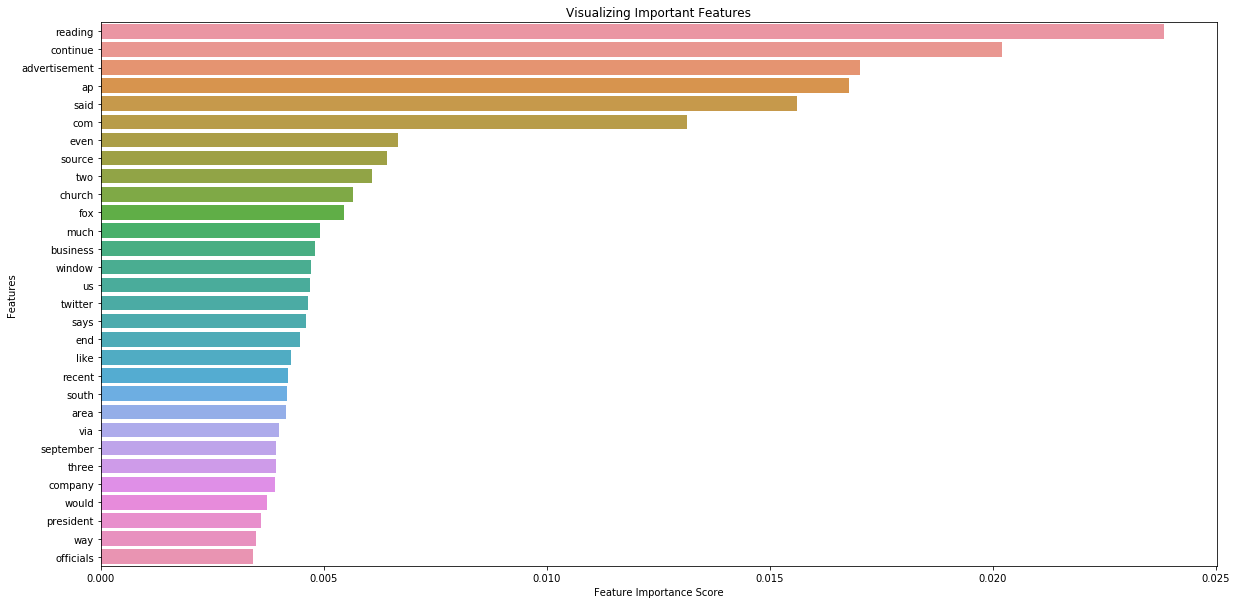

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))# Creating a bar plot
bar_plot=sns.barplot(x=top_30.importance, y=top_30.features)
fig = bar_plot.get_figure()
fig.savefig('feature importance ranking.png')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()